In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import scipy as sp # type: ignore
from scipy.optimize import curve_fit # type: ignore
import matplotlib.pyplot as plt # type: ignore

#Functional API
import tensorflow as tf # type: ignore
from tensorflow import keras # type: ignore
from keras.models import Model # type: ignore
import keras.optimizers # type: ignore
from keras.layers import Dense, Input # type: ignore

# UNITS
ev2au = 1/27.211396132
au2ev = 27.211396132
ang2au = 1/0.529177249
au2ang = 0.529177249
au2fs = 1/41.34137333656
fs2au = 41.34137333656
au2debye = 1/0.39343
debye2au = 0.39343
au2nm = 0.052917720859
nm2au = 1/0.052917720859
au2cm1 = 2.1947463137E5
cm12au = 1/(2.1947463137E5)
au2amu = 1/1822.88848325
amu2au = 1822.88848325
thz2au = 1.0/0.029979/au2cm1

In [2]:
#La suma debe ser una suma de 32 terminos

coeff_matrix = np.zeros((32,4))
coeff_matrix[0,:] = [0,0,1,32849.58]
coeff_matrix[1,:] = [0,1,1,-17553.99]
coeff_matrix[2,:] = [1,0,1,-27625.23]
coeff_matrix[3,:] = [2,0,0,50043.09]
coeff_matrix[4,:] = [4,0,0,336.49]
coeff_matrix[5,:] = [0,1,2,-3360.94]
coeff_matrix[6,:] = [0,3,0,-64.84]
coeff_matrix[7,:] = [1,1,1,18285.40]
coeff_matrix[8,:] = [2,0,1,-7181.44]
coeff_matrix[9,:] = [0,0,4,2553.25]
coeff_matrix[10,:] = [0,2,2,-4905.39]
coeff_matrix[11,:] = [0,4,0,3505.21]
coeff_matrix[12,:] = [1,1,2,-21845.86]
coeff_matrix[13,:] = [1,3,0,-1416.44]
coeff_matrix[14,:] = [2,1,1,5596.86]
coeff_matrix[15,:] = [3,0,1,-142.39]
coeff_matrix[16,:] = [0,0,2,15623.64]
coeff_matrix[17,:] = [0,2,0,72972.84]
coeff_matrix[18,:] = [1,1,0,9857.17]
coeff_matrix[19,:] = [3,0,0,-2376.30]
coeff_matrix[20,:] = [0,2,1,-8550.95]
coeff_matrix[21,:] = [1,0,2,-4597.25]
coeff_matrix[22,:] = [1,2,0,-657.28]
coeff_matrix[23,:] = [2,1,0,1985.36]
coeff_matrix[24,:] = [0,1,3,-5546.12]
coeff_matrix[25,:] = [0,3,1,-11098.50]
coeff_matrix[26,:] = [1,0,3,-9178.03]
coeff_matrix[27,:] = [1,2,1,948.74]
coeff_matrix[28,:] = [2,0,2,-983.04]
coeff_matrix[29,:] = [2,2,0,-584.78]
coeff_matrix[30,:] = [3,1,0,1694.77]
coeff_matrix[31,:] = [0,0,3,4971.79]

def V(R1,R2,theta):
    R1e = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
    R2e = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
    alpha_1 = 1.95/ang2au #Amstrong^-1
    alpha_2 = 2.34/ang2au #Amstrong^-1
    theta_e = np.pi #Degrees

    aR1 = -alpha_1*(R1-R1e)
    aR2 = -alpha_2*(R2-R2e)

    y_1 = 1.0 - np.exp(aR1)
    y_2 = 1.0 - np.exp(aR2)
    y_3 = np.cos(theta) - np.cos(theta_e)

    suma = 0.0
    for i in range(32):
        suma = suma + (coeff_matrix[i,3]*cm12au)*(y_1**int(coeff_matrix[i,0]))*(y_2**int(coeff_matrix[i,1]))*(y_3**(coeff_matrix[i,2]))
    return(suma)

Text(0.5, 1.0, 'Potenciales de energia de superficie')

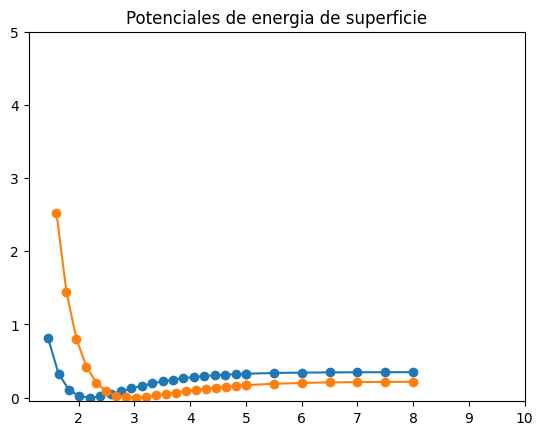

In [3]:
q1 = np.concatenate((np.linspace(1.45,5.0,20),np.linspace(5.0, 8, 7))) #Azul
q2 = np.concatenate((np.linspace(1.6,5.0,20),np.linspace(5.0, 8, 7))) #Naranja
R1_eq = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
R2_eq = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
theta_eq = np.pi
plt.plot(q1, V(R1_eq,q1,theta_eq), "o-")
plt.plot(q2, V(q2,R2_eq,theta_eq), "o-")
plt.axis([1.1,10,-0.05,5])
plt.title("Potenciales de energia de superficie")
#plt.show()

In [ ]:
# Generacion del archivo de datos
data_set = np.zeros((len(q1)**2,3)) #Dim(729,3)
l = 0 #Inicializa en 0
for i in range(len(q1)): #R1
    for j in range(len(q2)): #R2
        data_set[l,:] = q1[i],q2[j],V(q1[i],q2[j],np.pi) #Obtenemos valores para R1, R2 y V(R1,R2)
        l = l + 1

df = pd.DataFrame(data_set)
df.to_csv('PotencialOCS_2.csv')
df.columns = ['R1','R2','V'] #Renombramos las columnas

,R1,R2,V
0,1.45,1.600000,4.769169
1,1.45,1.778947,4.379094
2,1.45,1.957895,4.140660
3,1.45,2.136842,3.995638
4,1.45,2.315789,3.909743
...,...,...,...
724,8.00,6.000000,0.607018
725,8.00,6.500000,0.610105
726,8.00,7.000000,0.611772
727,8.00,7.500000,0.612672


In [5]:
inputsmodel = df.drop('V', axis=1)
target = df.iloc[:,-1]

In [ ]:
#Creamos una funcion custom_loss incluyendo la perdida fisica de la pinn.
from scipy.optimize import curve_fit # type: ignore

def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0

xdata = np.concatenate((np.linspace(1.6,5.0,30),np.linspace(5.0, 8, 7))) #q2
morse_parameters = np.zeros((len(q1),5))

for i in range(len(q1)): #En este range cambio la forma de graficar
    ydata = V(q1[i],xdata,theta_eq) #Potencial segun xdata
    popt, pcov = curve_fit(morsepotential, xdata, ydata, p0=[3.49440974e-01,  1.22952512e+00, -1.73828756e-03    ,  2.18903764e+00]) #Se hace el fitting considerando un p0 inicial para el resto
    
    morse_parameters[i,0] = q1[i]
    morse_parameters[i,1:] = popt
    
    #plt.title("Fitting de curvas morse en parametros de q2")
    #plt.plot(xdata, morsepotential(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % 
    #tuple(popt)) #Ploteo todos los popt calculados segun el ciclo for
    
    dfMorse = pd.DataFrame(morse_parameters[:]) #Creo el dataset de los valores
    dfMorse.columns = ['q','D','alpha','E','Req']
    
dfaxu = pd.DataFrame(dfMorse.loc[dfMorse.index.repeat(27)].reset_index(drop=True))
dfFinal = pd.concat([df,dfaxu],axis=1)

Las dimensiones de los parametros de los morses son:  (27, 5)


In [7]:
fit_v = []

for i, row, in dfFinal.iterrows():
    R2 = row['R2']
    D = row['D']
    alpha = row['alpha']
    E = row['E']
    Req = row['Req']
    
    potential = morsepotential(R2,D,alpha,E,Req)
    fit_v.append(potential)
    
dfFinal['VFitting'] = fit_v

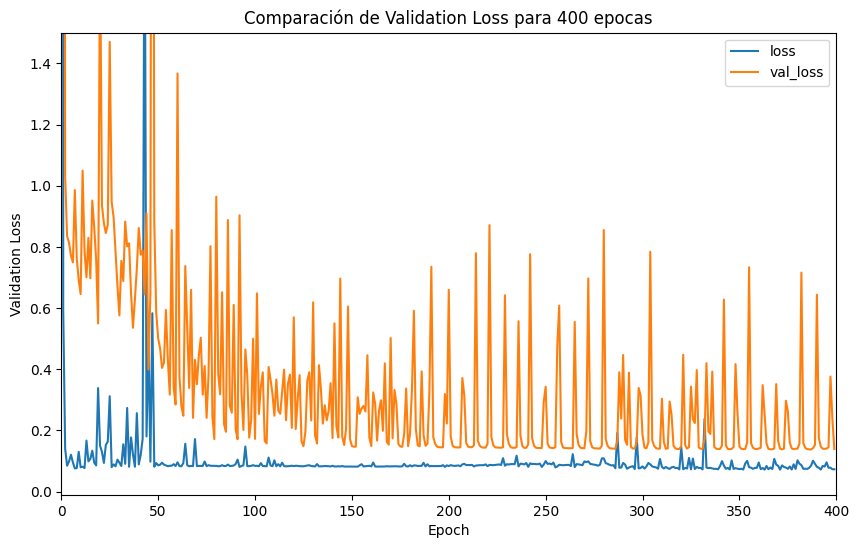

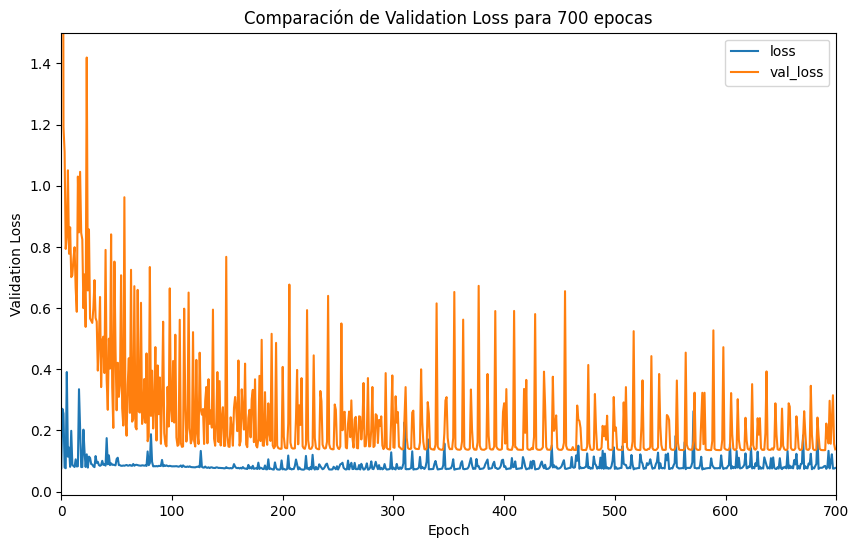

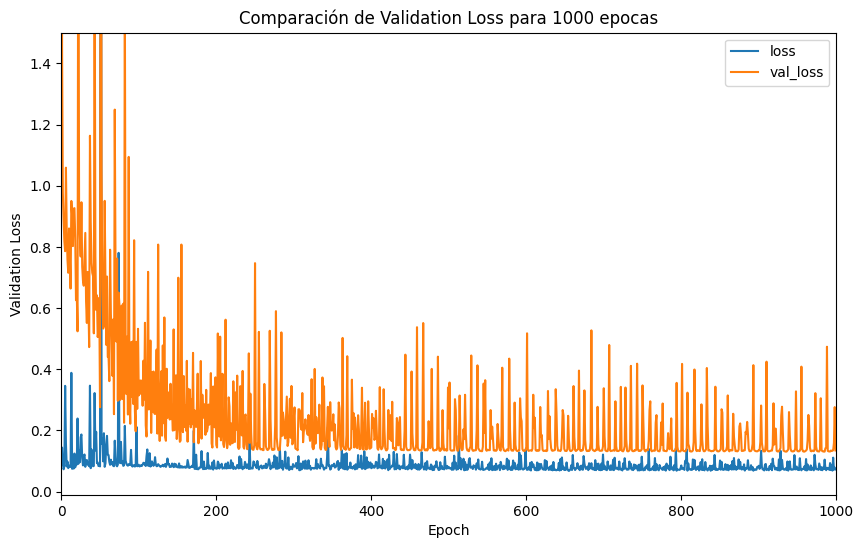

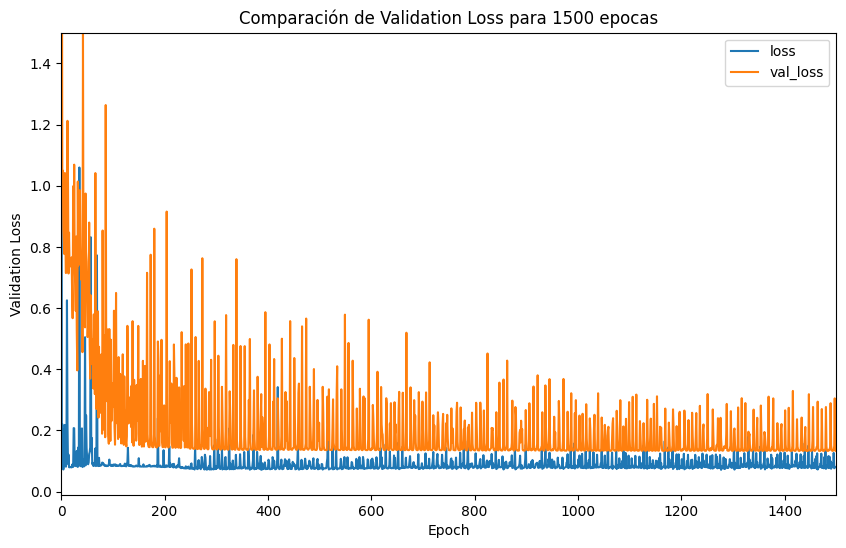

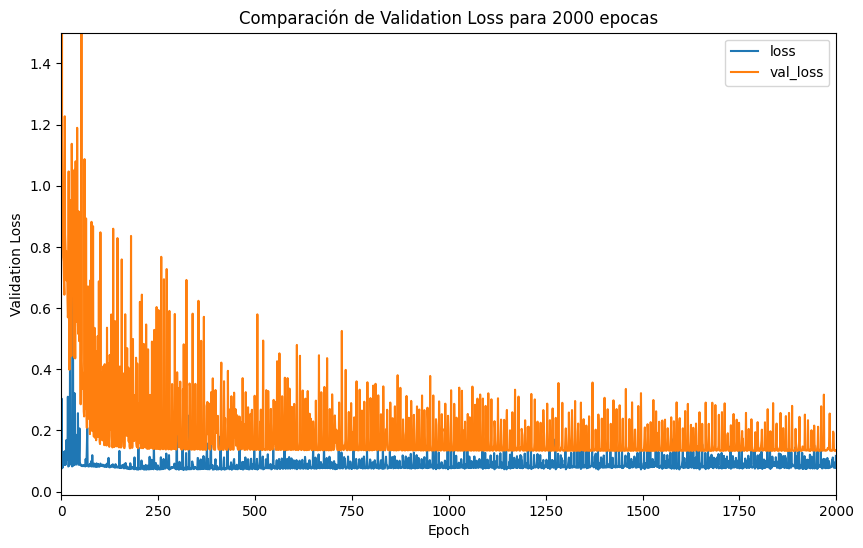

In [48]:
test400 = np.load('TrainRES_EP_0.01_EPs400_VSplit0.2.npy')
test700 = np.load('TrainRES_EP_0.01_EPs700_VSplit0.2.npy')
test1000 = np.load('TrainRES_EP_0.01_EPs1000_VSplit0.2.npy')
test1500 = np.load('TrainRES_EP_0.01_EPs1500_VSplit0.2.npy')
test2000 = np.load('TrainRES_EP_0.01_EPs2000_VSplit0.2.npy')

ep = [400,700,1000,1500,2000]
test = [test400, test700, test1000, test1500, test2000]

for i in range(len(ep)):
    plt.figure(figsize=(10,6))
    plt.plot(test[i][0,:], label=f'loss')
    plt.plot(test[i][1,:], label=f'val_loss')
    plt.axis([0, ep[i], -0.01, 1.5])
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.title(f'Comparación de Validation Loss para {ep[i]} epocas')    
    plt.legend()
    plt.show()

In [49]:
def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0

r_values = np.linspace(1.5, 6.0, 729) #qvec
r_values_tf = tf.convert_to_tensor(r_values, dtype=tf.float32)


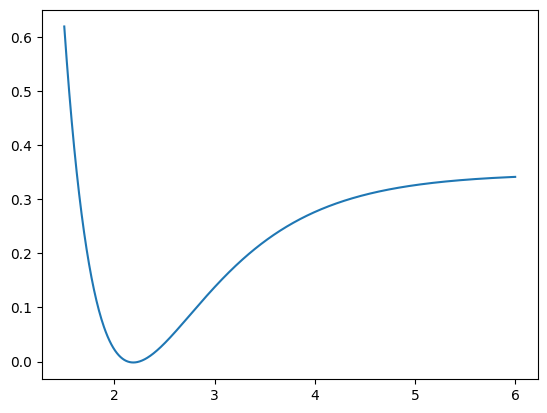

In [50]:
plt.plot(r_values, morsepotential(r_values, 0.349440974, 1.22952512, -0.00173828756, 2.18903764), label='Morse Potential')

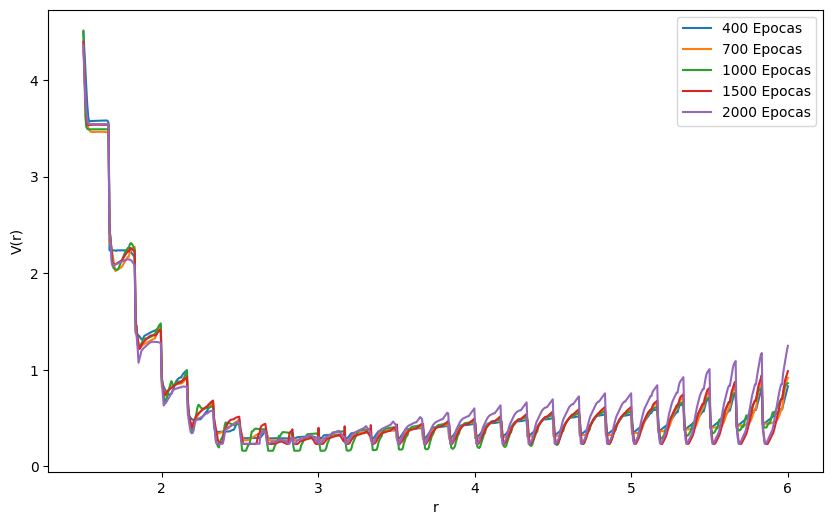

In [52]:
v400 = np.load('TrainPREDS_EP_0.01_EPs400_VSplit0.2.npy')
v700 = np.load('TrainPREDS_EP_0.01_EPs700_VSplit0.2.npy')
v1000 = np.load('TrainPREDS_EP_0.01_EPs1000_VSplit0.2.npy')
v1500 = np.load('TrainPREDS_EP_0.01_EPs1500_VSplit0.2.npy')
v2000 = np.load('TrainPREDS_EP_0.01_EPs2000_VSplit0.2.npy')
y_pred = [v400, v700, v1000, v1500, v2000]


plt.figure(figsize=(10,6))

#Morse exacto
#plt.plot(r_values, morsepotential(r_values, 0.35, 1.0, 0.0, 2.5), label="Morse exacto", color='red', linewidth=2)

#Predicciones de cada ep
for i in range(len(ep)):
    plt.plot(r_values, y_pred[i][1,:], label=f'{ep[i]} Epocas', linewidth=1.5)
    
plt.xlabel("r")
plt.ylabel("V(r)")
#plt.title("Predicciones de la Red vs. Datos con Ruido y Morse Exacto")
plt.legend()
plt.show()
